# Dosenbach2007 — Figure 5

This notebook uses Julia2008 average connectome of all subjects to reproduce Figure 5 of the Dosenbach2007 paper.

Figure 5 is described as:

> Fig. 5. Histogram of the distribution of all 741 r values (0.01 bins). The interregional r values for our set of 39 ROIs were roughly symmetrically distributed around zero, with the preponderance of values occurring in the range from 0.2 to 0.2. This distribution showed a local minimum at 0.2 and a long right-sided tail of r values >0.2.

In [1]:
project_dir = '../..'

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.signal import find_peaks

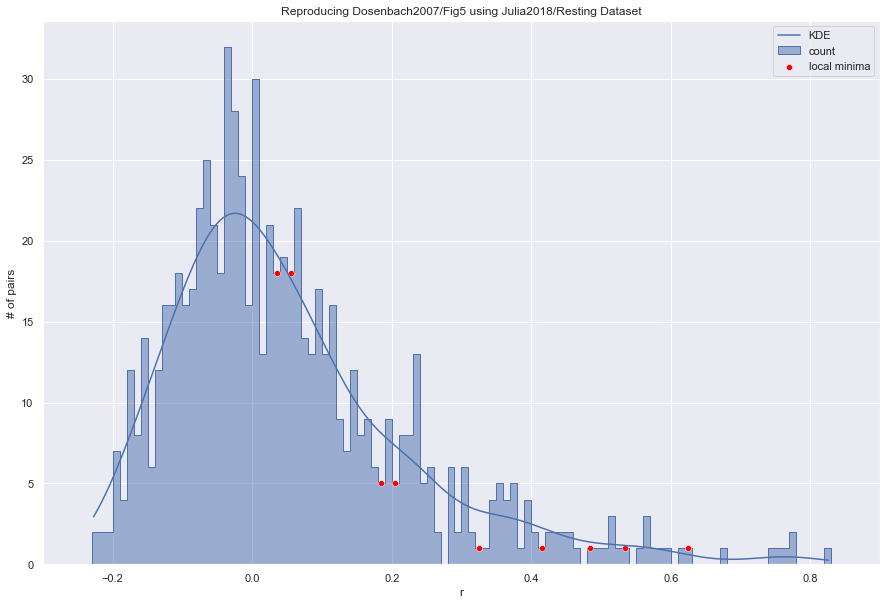

In [17]:
df = pd.read_csv(f'{project_dir}/outputs/julia2018_resting_connectome.all_subjects.tsv',
                 index_col=0, sep='\t')

# sns.heatmap(df)

labels = df.columns.values.tolist()
conn = df.values

# Figure 5 (Supplementary Materials)
conn_vec = conn[np.triu_indices_from(conn, k=1)]  # size=741
bins = np.arange(-1, 1, 0.01) + 0.05
bin_indices = np.digitize(conn_vec, bins)


(unique_bin_indices, counts) = np.unique(bin_indices, return_counts=True)

peaks, _ = find_peaks(-counts, width=2)
peak_bin_indices = unique_bin_indices[peaks]
peaks_x = bins[peak_bin_indices] - 0.005
peaks_y = counts[peaks]

plt.figure(figsize=(15,10))

# plot histogram and KDE
ax = sns.histplot(x=conn_vec, bins=bins, kde=True, element='step')

# plot local minima points
sns.scatterplot(x=peaks_x, y=peaks_y, marker='o', color='red', ax=ax)

ax.set(xlabel='r',
       ylabel='# of pairs',
       xlim=(-.3, .9),
       title='Reproducing Dosenbach2007/Fig5 using Julia2018/Resting Dataset')

plt.legend(labels=['KDE', 'count', 'local minima'])

plt.show()
